In [1]:
import jax
from jax import numpy as jnp
from jax import random

import data
from nam_classic import nam_excel_hydroapi

from matplotlib import pyplot as plt

C:\Users\MUNRAS\PycharmProjects\NAM\.venv\Lib\site-packages\jax\_src\numpy\array_methods.py:125: UserWarning: Explicitly requested dtype float64 requested in astype is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/jax-ml/jax#current-gotchas for more.
  return lax_numpy.astype(self, dtype, copy=copy, device=device)


In [31]:
model = nam_excel_hydroapi.NAM.generate(shape=(50,))

In [3]:
fs, pred = model.predict(data.observations)

In [4]:
model.squared_error(data.observations, data.discharge)

Array(6182.0625, dtype=float32)

In [32]:
trace = model.optimize(data.observations, data.discharge, 50, True)

Optimizing...:   0%|          | 0/50 [00:00<?, ?it/s]

In [7]:
import pandas as pd
import hydro_model_interface

In [33]:
losses = jnp.stack([x["loss"] for x in trace])

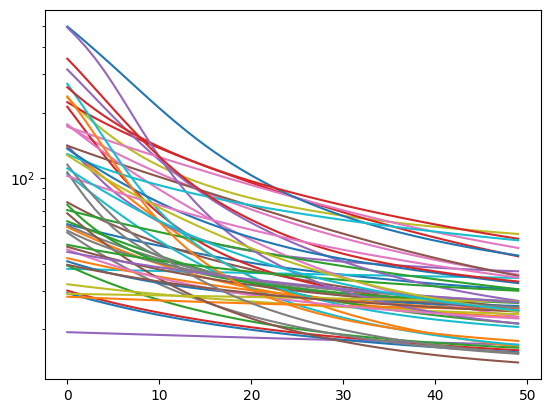

In [34]:
fig, ax = plt.subplots()
for i in range(losses.shape[-1]):
    ax.plot(losses[:,i])
ax.set_yscale("log")

In [35]:
model.params_trainable

{'ck1': Array([0.696879  , 0.5950166 , 0.7927196 , 0.8046985 , 0.7393608 ,
        0.7863417 , 0.83506346, 0.087042  , 0.8929519 , 0.7173917 ,
        0.75008905, 0.7363925 , 0.65897584, 0.00621822, 0.17840911,
        0.8417849 , 0.88345075, 0.7382187 ,        nan, 0.8844969 ,
        0.42344296, 0.46470657, 0.89899147, 0.96511   , 0.7402614 ,
        0.09633166, 0.97234863, 0.02555985, 0.3253618 , 0.5864234 ,
        0.8976675 , 0.3077065 , 0.02866086, 0.9726546 , 0.25960463,
        0.76078   , 0.76945645, 0.03407035, 0.0847032 , 0.94749486,
        0.7244499 , 0.48781267, 0.68978995, 0.74833983, 0.77475196,
        0.38700593, 0.8136656 , 0.59197706, 0.87339604, 0.84142494],      dtype=float32),
 'ck2': Array([9.999998e-07, 9.999998e-07, 9.999998e-07, 9.999998e-07,
        9.999998e-07, 9.999998e-07, 9.999998e-07, 9.999998e-07,
        9.999998e-07, 9.999998e-07, 9.999998e-07, 9.999998e-07,
        9.999998e-07, 9.999998e-07, 9.999998e-07, 9.999998e-07,
        9.999998e-07, 9.9999

In [36]:
model.state_trainable

{'bf': Array([0.7082538 , 0.9526554 , 0.75868267, 0.724108  , 0.9874795 ,
        0.7140956 , 0.93661535, 0.90151525, 0.53928524, 0.6691968 ,
        0.67264485, 0.92080486, 0.662284  , 0.5627547 , 0.9115789 ,
        0.91374636, 0.98954856, 0.74305296,        nan, 0.64558524,
        0.53142345, 0.95056397, 0.8805089 , 0.6861681 , 0.78565216,
        0.74814296, 0.9087819 , 0.89068973, 0.59430885, 0.5692961 ,
        0.7335729 , 0.625385  , 0.5896853 , 0.79953957, 0.6920804 ,
        0.85425085, 1.0237367 , 0.5459771 , 0.8672471 , 0.9202406 ,
        0.64921874, 0.8679205 , 0.7190195 , 0.7225717 , 0.5611614 ,
        0.900738  , 0.635534  , 0.70589113, 0.5446256 , 0.7290552 ],      dtype=float32),
 'l_ratio': Array([0.578906  , 0.01318397, 0.6603072 , 0.46244082, 0.668076  ,
        0.9000134 , 0.68720603, 0.4991159 , 0.38638243, 0.24790847,
        0.9209116 , 0.77888095, 0.486539  , 0.96019256, 0.66616035,
        0.7538028 , 0.26142824, 0.32446218,        nan, 0.9388023 ,
        0